<a href="https://colab.research.google.com/github/raiharshit47/test/blob/main/Handwritten_digits_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
y_train[classes[2]]

4

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize = (10,2))
  plt.imshow(X[index])
  plt.xlabel(y[classes[index]])

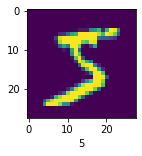

In [ ]:
plot_sample(X_train, y_train, 0)

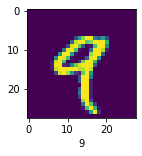

In [ ]:
plot_sample(X_train, y_train, 4)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
cnn = keras.Sequential([
                        #cnn
                        keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation= 'relu', input_shape=(28,28, 1)),
                        keras.layers.MaxPooling2D((2,2)),

                        keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                        keras.layers.MaxPooling2D((2,2)),

                        #Dense
                        keras.layers.Flatten(),
                        keras.layers.Dense(100, activation='relu'),
                        keras.layers.Dense(10, activation='sigmoid')
])

cnn.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1370 - accuracy: 0.9579
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0463 - accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0306 - accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0224 - accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0165 - accuracy: 0.9945
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0122 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0108 - accuracy: 0.9968
Epoch 8/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0090 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 51s 27m

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0385 - accuracy: 0.9906


[0.038484204560518265, 0.9905999898910522]

In [ ]:
y_pred = cnn.predict(X_test)

In [ ]:
y_pred[:5]

array([[1.45643950e-04, 2.04902887e-03, 4.65140292e-05, 1.31111443e-01,
        7.20033050e-03, 2.56029125e-05, 4.38300125e-11, 1.00000000e+00,
        6.28151429e-06, 8.79105806e-01],
       [5.29319048e-04, 5.82592607e-01, 1.00000000e+00, 6.53431371e-08,
        1.16216725e-04, 6.50745625e-13, 1.33060306e-01, 5.40538558e-10,
        7.00175762e-04, 8.26583273e-05],
       [7.97998564e-06, 9.99998748e-01, 8.43586986e-06, 4.20210959e-08,
        8.05409253e-02, 6.57867789e-02, 6.52953982e-03, 1.02359056e-03,
        1.00709915e-01, 4.91248102e-05],
       [1.00000000e+00, 1.14752011e-05, 6.28962425e-06, 5.03832598e-06,
        7.28524185e-07, 4.53472137e-04, 9.99872565e-01, 2.46735704e-06,
        3.12949121e-02, 9.79968905e-03],
       [5.39611689e-09, 9.69901681e-03, 3.57459430e-05, 2.11997576e-06,
        1.00000000e+00, 1.26627088e-02, 1.73052868e-07, 3.05257572e-06,
        8.60987257e-07, 9.82257783e-01]], dtype=float32)

In [ ]:
y_pred = [np.argmax(i) for i in y_pred]
y_pred[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

